In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **DATA PREPROCESSING**

## **Importing Bussiness data file that contains all restaurant details**

In [2]:
import pandas as pd
import string
df = pd.read_csv('/content/drive/My Drive/ML_Project/business.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,5,8,15,18,21,27,30,43,49,52,62,64,66,70,84,89,92,100) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(5)

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,categories,latitude,attributes.Outdoor Seating,attributes.Alcohol,attributes.Ambience.classy,attributes.Payment Types.mastercard,attributes.Parking.lot,attributes.Ambience.touristy,attributes.Corkage,hours.Tuesday.open,attributes.Good For.brunch,attributes.Payment Types.amex,name,hours.Monday.open,attributes.Waiter Service,attributes.Parking.street,attributes.Ambience.hipster,attributes.BYOB/Corkage,attributes.Hair Types Specialized In.straightperms,attributes.Music.live,attributes.Dietary Restrictions.dairy-free,attributes.Music.background_music,attributes.Price Range,attributes.Good For.breakfast,attributes.Parking.garage,attributes.Music.karaoke,attributes.Good For Dancing,review_count,attributes.Hair Types Specialized In.asian,state,...,stars,attributes.Payment Types.visa,type,attributes.Caters,attributes.Ambience.intimate,attributes.Music.playlist,attributes.Good For.latenight,attributes.Good For.dinner,attributes.Coat Check,longitude,hours.Monday.close,attributes.Hair Types Specialized In.extensions,hours.Tuesday.close,hours.Saturday.close,attributes.Good for Kids,attributes.Parking.validated,hours.Sunday.open,attributes.Accepts Insurance,attributes.Music.dj,attributes.Dietary Restrictions.soy-free,attributes.Has TV,hours.Sunday.close,attributes.Ambience.casual,attributes.By Appointment Only,attributes.Dietary Restrictions.kosher,attributes.Dogs Allowed,attributes.Drive-Thru,attributes.Dietary Restrictions.vegetarian,hours.Wednesday.open,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,vcNAWiLM4dR7D2nwwJ7nCA,NaN,NaN,NaN,8:00,NaN,NaN,NaN,NaN,8:00,Doctors;Health & Medical,33.499313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:00,NaN,NaN,"Eric Goldberg, MD",8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,AZ,...,3.5,NaN,business,NaN,NaN,NaN,NaN,NaN,NaN,-111.983758,17:00,NaN,17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JwUE5GmEO-sH1FuwJgKBlQ,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,43.238893,False,none,False,NaN,True,False,NaN,NaN,False,NaN,Pine Cone Restaurant,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,1.0,False,False,NaN,NaN,26,NaN,WI,...,4.0,NaN,business,False,False,NaN,False,False,NaN,-89.335844,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
2,uGykseHzyS5xAMWoN6YUqA,False,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,American (Traditional);Restaurants,43.252267,False,NaN,False,NaN,True,False,NaN,6:00,True,NaN,Deforest Family Restaurant,6:00,True,False,False,NaN,NaN,NaN,NaN,NaN,1.0,False,False,NaN,NaN,16,NaN,WI,...,4.0,NaN,business,False,False,NaN,False,False,NaN,-89.353437,22:00,NaN,22:00,22:00,True,False,6:00,NaN,NaN,NaN,True,21:00,True,NaN,NaN,NaN,NaN,NaN,6:00,quiet,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
3,LRKJF43s9-3jG9Lgx4zODg,NaN,NaN,NaN,10:30,NaN,NaN,NaN,NaN,10:30,Food;Ice Cream & Frozen Yogurt;Fast Food;Resta...,43.251045,NaN,NaN,NaN,NaN,True,NaN,NaN,10:30,NaN,NaN,Culver's,10:30,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,NaN,NaN,7,NaN,WI,...,4.5,NaN,business,NaN,NaN,NaN,NaN,NaN,NaN,-89.374983,22:00,NaN,22:00,22:00,NaN,False,10:30,NaN,NaN,NaN,NaN,22:00,NaN,NaN,NaN,NaN,NaN,NaN,10:30,NaN,NaN,casual,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,RgDg-k9S5YD_BaxMckifkg,NaN,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,Chinese;Restaurants,43.240875,False,NaN,NaN,NaN,NaN,NaN,NaN,11:00,NaN,NaN,Chang Jiang Chinese Kitchen,11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## **Dropping unwanted columns**

## **Selecting Required Columns from the Dataset**

In [3]:
Bussiness_df  = df[['business_id','categories','name','review_count','state','stars']]
Bussiness_df.head(5)

,business_id,categories,name,review_count,state,stars
0,vcNAWiLM4dR7D2nwwJ7nCA,Doctors;Health & Medical,"Eric Goldberg, MD",7,AZ,3.5
1,JwUE5GmEO-sH1FuwJgKBlQ,Restaurants,Pine Cone Restaurant,26,WI,4.0
2,uGykseHzyS5xAMWoN6YUqA,American (Traditional);Restaurants,Deforest Family Restaurant,16,WI,4.0
3,LRKJF43s9-3jG9Lgx4zODg,Food;Ice Cream & Frozen Yogurt;Fast Food;Resta...,Culver's,7,WI,4.5
4,RgDg-k9S5YD_BaxMckifkg,Chinese;Restaurants,Chang Jiang Chinese Kitchen,3,WI,4.0


## **Deleting NAN or Null values**

In [4]:
Bussiness_df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
Bussiness_df.shape

(41814, 6)

## **Number of unique Restaurants and names**

In [5]:
Bussiness_df['name'].unique

<bound method Series.unique of 0                            Eric Goldberg, MD
1                         Pine Cone Restaurant
2                   Deforest Family Restaurant
3                                     Culver's
4                  Chang Jiang Chinese Kitchen
                         ...                  
42148                 Rocco's NY Pizza & Pasta
42149                          Pilates Central
42150    Yelp's Secret Cinema: Made In Arizona
42151          LaBella Pizzeria and Restaurant
42152                     Oriental Supermarket
Name: name, Length: 41814, dtype: object>

In [ ]:
Bussiness_df.isnull().sum()

business_id     0
categories      0
name            0
review_count    0
state           0
stars           0
dtype: int64

## **Importing Review data file that contains user and his/her review details**

In [6]:
Review_df = pd.read_csv('/content/drive/My Drive/ML_Project/review.csv')

In [ ]:
Review_df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2


## **Deleting NAN values in Review dataset**

In [7]:
Review_df.dropna(inplace=True)


In [ ]:
Review_df.isnull().sum()

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

## **Dropping Duplicate Rows**

In [ ]:
Review_df.shape

(1125457, 10)

In [8]:
Review_df.drop_duplicates()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2
...,...,...,...,...,...,...,...,...,...,...
1125453,lhMo-dGq0V2iKqBIiwUJSg,eujuvkGqy2ssZ9zjdPJrMA,"Located at the bottom of Lauriston Place, this...",0,BVxlrYWgmi-8TPGMe6CTpg,0,5,2010-08-11,review,1
1125454,TTrzXCtB2MZA8Azw56bRlw,vFA5KXUGEH-oMcM6WTC-8w,I love this place! I think the staff struggle ...,1,BVxlrYWgmi-8TPGMe6CTpg,2,5,2012-06-15,review,1
1125455,rtS7mDof5d-cEPBsmVuUJw,0sVK4VUxvj3cy78W0DlvWQ,Perfect little shop to go to if you want to pi...,1,BVxlrYWgmi-8TPGMe6CTpg,0,3,2013-09-17,review,2
1125456,tZs84cKAUSOtP_nAiSdreQ,Nx88b_tCsP7Oja3PvhR5tQ,I visit here once or twice a month. Just to ge...,1,BVxlrYWgmi-8TPGMe6CTpg,1,4,2013-09-18,review,1


## **Selecting Required columns from Review Dataset**

In [9]:
Review_df  = Review_df[['user_id','text','business_id','stars','type']]
Review_df.head(5)

,user_id,text,business_id,stars,type
0,Xqd0DzHaiyRqVH3WRG7hzg,dr. goldberg offers everything i look for in a...,vcNAWiLM4dR7D2nwwJ7nCA,5,review
1,H1kH6QZV7Le4zqTRNxoZow,"Unfortunately, the frustration of being Dr. Go...",vcNAWiLM4dR7D2nwwJ7nCA,2,review
2,zvJCcrpm2yOZrxKffwGQLA,Dr. Goldberg has been my doctor for years and ...,vcNAWiLM4dR7D2nwwJ7nCA,4,review
3,KBLW4wJA_fwoWmMhiHRVOA,Been going to Dr. Goldberg for over 10 years. ...,vcNAWiLM4dR7D2nwwJ7nCA,4,review
4,zvJCcrpm2yOZrxKffwGQLA,Got a letter in the mail last week that said D...,vcNAWiLM4dR7D2nwwJ7nCA,4,review


## **The column type of review dataset has same value "1"**

review    1125457
Name: type, dtype: int64


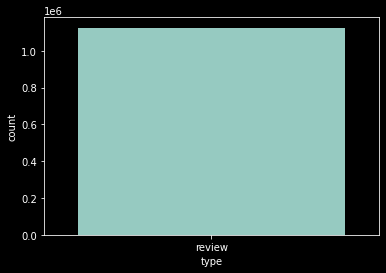

In [ ]:
import seaborn as sb
print(Review_df.type.value_counts())
sb.countplot(x='type',data=Review_df)

## **so we can remove 'type' column because it has only one value**

In [10]:
del Review_df['type']
Review_df.head()

,user_id,text,business_id,stars
0,Xqd0DzHaiyRqVH3WRG7hzg,dr. goldberg offers everything i look for in a...,vcNAWiLM4dR7D2nwwJ7nCA,5
1,H1kH6QZV7Le4zqTRNxoZow,"Unfortunately, the frustration of being Dr. Go...",vcNAWiLM4dR7D2nwwJ7nCA,2
2,zvJCcrpm2yOZrxKffwGQLA,Dr. Goldberg has been my doctor for years and ...,vcNAWiLM4dR7D2nwwJ7nCA,4
3,KBLW4wJA_fwoWmMhiHRVOA,Been going to Dr. Goldberg for over 10 years. ...,vcNAWiLM4dR7D2nwwJ7nCA,4
4,zvJCcrpm2yOZrxKffwGQLA,Got a letter in the mail last week that said D...,vcNAWiLM4dR7D2nwwJ7nCA,4


In [ ]:
Review_df.shape

(1125457, 4)

## **Bussiness_df - Business data**
## **Review_df - Review data**

## **Top 10 Highly rated Restaurants**

In [ ]:
res = Bussiness_df.loc[Bussiness_df['stars']==5.0].name.values
for i in range(10):
  print('\033[1m'+res[i]+'\033[0m')
  print("")

Parsonage Bed & Breakfast the

Harbor Athletic Club

Lori's Pet-Agree Salon Llc

Killian Dental Clinic

All Pets Veterinary Clinic

Ace Hardware

Revolution Hair Company Inc

Bennett's Auto Repair LLC

Dunn's Import Inc

Sun Prairie Public Library



## **Review_df is main important data for visualization**

## **Number of users given for each star**

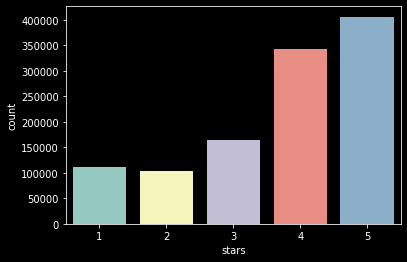

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('dark_background')
sb.countplot(x='stars',data=Review_df)


## **Number of Restaurants**

In [ ]:
n = len(pd.unique(Bussiness_df['name']))
n

30671

## **Number of users count in each state**

AZ     22011
NV     14444
EDH     2832
WI      2105
ON       297
MLN      102
ELN        8
FIF        3
NY         2
SCB        2
XGL        1
KHL        1
MN         1
CA         1
NC         1
NTH        1
GA         1
MA         1
Name: state, dtype: int64


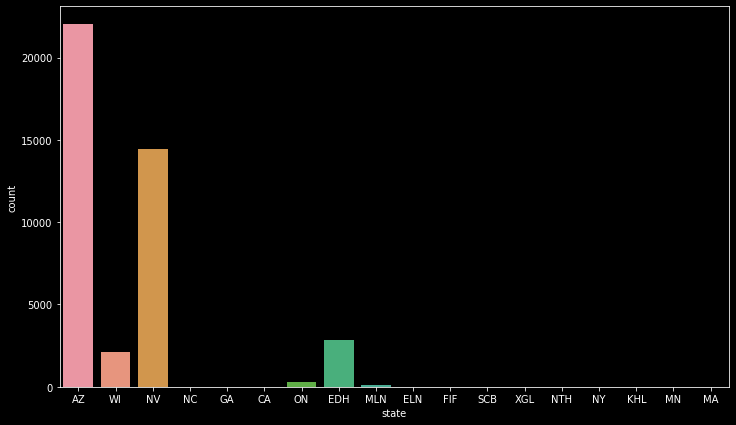

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
print(Bussiness_df.state.value_counts())
plt.style.use('dark_background')
sb.countplot(x='state',data=Bussiness_df, ax=ax)
plt.show()

## **Average number of stars in each state**

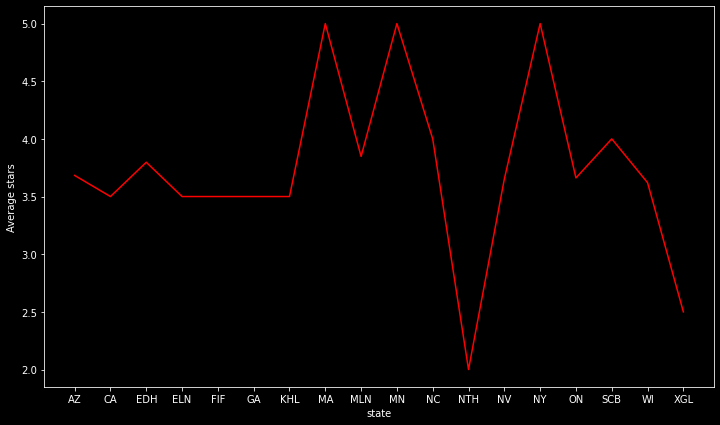

In [ ]:
x1 = Bussiness_df.groupby('state').mean()['stars']
plt.figure(figsize=(12, 7))
plt.style.use('dark_background')
plt.plot(x1,c='r')
plt.xlabel('state')
plt.ylabel('Average stars')

plt.show()

## **Range of stars given in each state**

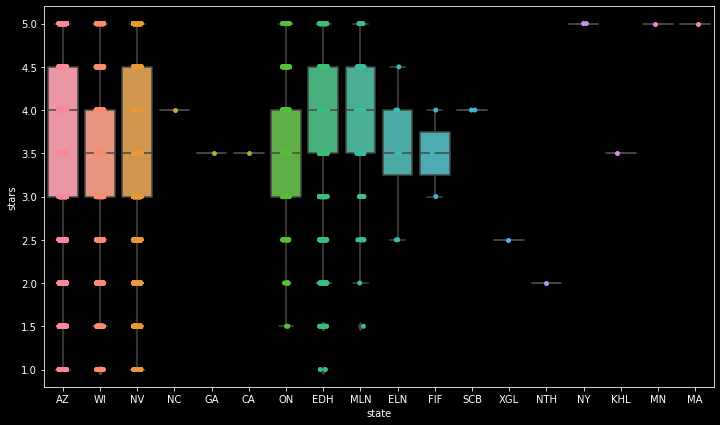

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(12, 7))
x1 = Bussiness_df.groupby('state').mean()['stars']
sns.boxplot(x= 'state',y = 'stars',data=Bussiness_df)
sns.stripplot(x= 'state',y = 'stars',data=Bussiness_df)
plt.show()

## **We taken 2 lakth rows inorder to manage Ram, Storage and Time issues**

In [11]:
Review_df = Review_df.iloc[:200000,:]

## **Remove integer valus in text for model to increase accuracy**

In [12]:
num = ['1','2','3','4','5','6','7','8','9','0']
def text_process_num(mess):
  nopunc = [char for char in mess if char not in num]
  nopunc = ''.join(nopunc)
  return nopunc

In [13]:
Review_df['text'] = Review_df['text'].apply(text_process_num)

In [ ]:
Review_df.head(5)

,user_id,text,business_id,stars
0,Xqd0DzHaiyRqVH3WRG7hzg,dr goldberg offers everything i look for in a ...,vcNAWiLM4dR7D2nwwJ7nCA,5
1,H1kH6QZV7Le4zqTRNxoZow,Unfortunately the frustration of being Dr Gold...,vcNAWiLM4dR7D2nwwJ7nCA,2
2,zvJCcrpm2yOZrxKffwGQLA,Dr Goldberg has been my doctor for years and I...,vcNAWiLM4dR7D2nwwJ7nCA,4
3,KBLW4wJA_fwoWmMhiHRVOA,Been going to Dr Goldberg for over years I th...,vcNAWiLM4dR7D2nwwJ7nCA,4
4,zvJCcrpm2yOZrxKffwGQLA,Got a letter in the mail last week that said D...,vcNAWiLM4dR7D2nwwJ7nCA,4


## **Remove punctuations from text for model to increase accuracy**

In [14]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    return nopunc

In [15]:
#clean text
Review_df['text'] = Review_df['text'].apply(text_process)

In [ ]:
Review_df.head()

,user_id,text,business_id,stars
0,Xqd0DzHaiyRqVH3WRG7hzg,dr goldberg offers everything i look for in a ...,vcNAWiLM4dR7D2nwwJ7nCA,5
1,H1kH6QZV7Le4zqTRNxoZow,Unfortunately the frustration of being Dr Gold...,vcNAWiLM4dR7D2nwwJ7nCA,2
2,zvJCcrpm2yOZrxKffwGQLA,Dr Goldberg has been my doctor for years and I...,vcNAWiLM4dR7D2nwwJ7nCA,4
3,KBLW4wJA_fwoWmMhiHRVOA,Been going to Dr Goldberg for over years I th...,vcNAWiLM4dR7D2nwwJ7nCA,4
4,zvJCcrpm2yOZrxKffwGQLA,Got a letter in the mail last week that said D...,vcNAWiLM4dR7D2nwwJ7nCA,4


## **Creating new data frames for predictions**

In [16]:
userid_df = Review_df[['user_id','text']]

In [17]:
business_df = Review_df[['business_id', 'text']]

In [18]:
cat_bus_df = Bussiness_df[['business_id','categories','name']]

In [ ]:
userid_df.head()

,user_id,text
0,Xqd0DzHaiyRqVH3WRG7hzg,dr goldberg offers everything i look for in a ...
1,H1kH6QZV7Le4zqTRNxoZow,Unfortunately the frustration of being Dr Gold...
2,zvJCcrpm2yOZrxKffwGQLA,Dr Goldberg has been my doctor for years and I...
3,KBLW4wJA_fwoWmMhiHRVOA,Been going to Dr Goldberg for over years I th...
4,zvJCcrpm2yOZrxKffwGQLA,Got a letter in the mail last week that said D...


In [ ]:
business_df.head()

,business_id,text
0,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg offers everything i look for in a ...
1,vcNAWiLM4dR7D2nwwJ7nCA,Unfortunately the frustration of being Dr Gold...
2,vcNAWiLM4dR7D2nwwJ7nCA,Dr Goldberg has been my doctor for years and I...
3,vcNAWiLM4dR7D2nwwJ7nCA,Been going to Dr Goldberg for over years I th...
4,vcNAWiLM4dR7D2nwwJ7nCA,Got a letter in the mail last week that said D...


In [ ]:
print(business_df.shape,userid_df.shape)

(1125457, 2) (1125457, 2)


## **Merging all duplicate reviews of the users**

In [19]:
userid_df = userid_df.groupby('user_id',as_index=False).agg({'text': ' '.join})

In [20]:
business_df = business_df.groupby('business_id',as_index=False).agg({'text': ' '.join})

In [ ]:
business_df.head()

,business_id,text
0,--XBxRlD92RaV6TyUnP8Ow,Yo their store is awesome That dude Richard i...
1,--sSW-WY3vyASh_eVPGUAw,Worst BofA EVER I will readily drive to the o...
2,-0HGqwlfw3I8nkJyMHxAsQ,Why stars Its McDonalds thats why Its consist...
3,-0QBrNvhrPQCaeo7mTo0zQ,Best shrimp burros If it wasnt in the hood ma...
4,-0bUDim5OGuv8R0Qqq6J4A,Stopped in for a Sunday Breakfast before a bas...


In [ ]:
print(business_df.shape,userid_df.shape)

(10164, 2) (74604, 2)


## **Here we merged business_df and Bussiness_df to get names of restaurants bu business_id**

In [21]:
business_df = business_df.merge(Bussiness_df, on='business_id', how='right')

In [ ]:
business_df.head()

,business_id,text,categories,name,review_count,state,stars
0,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg offers everything i look for in a ...,Doctors;Health & Medical,"Eric Goldberg, MD",7,AZ,3.5
1,JwUE5GmEO-sH1FuwJgKBlQ,Pretty good dinner with a nice selection of fo...,Restaurants,Pine Cone Restaurant,26,WI,4.0
2,uGykseHzyS5xAMWoN6YUqA,A really lovely surprise on a rather horrific ...,American (Traditional);Restaurants,Deforest Family Restaurant,16,WI,4.0
3,LRKJF43s9-3jG9Lgx4zODg,Californians are all about the InNOut where yo...,Food;Ice Cream & Frozen Yogurt;Fast Food;Resta...,Culver's,7,WI,4.5
4,RgDg-k9S5YD_BaxMckifkg,I really like both Chinese restaurants in town...,Chinese;Restaurants,Chang Jiang Chinese Kitchen,3,WI,4.0


In [22]:
business_df.dropna(inplace=True)

In [23]:
business_df.shape

(9910, 7)

## **Removed review_count column because it is not needed**

In [24]:
del business_df['review_count']

In [ ]:
business_df.head()

,business_id,text,categories,name,state,stars
0,vcNAWiLM4dR7D2nwwJ7nCA,dr goldberg offers everything i look for in a ...,Doctors;Health & Medical,"Eric Goldberg, MD",AZ,3.5
1,JwUE5GmEO-sH1FuwJgKBlQ,Pretty good dinner with a nice selection of fo...,Restaurants,Pine Cone Restaurant,WI,4.0
2,uGykseHzyS5xAMWoN6YUqA,A really lovely surprise on a rather horrific ...,American (Traditional);Restaurants,Deforest Family Restaurant,WI,4.0
3,LRKJF43s9-3jG9Lgx4zODg,Californians are all about the InNOut where yo...,Food;Ice Cream & Frozen Yogurt;Fast Food;Resta...,Culver's,WI,4.5
4,RgDg-k9S5YD_BaxMckifkg,I really like both Chinese restaurants in town...,Chinese;Restaurants,Chang Jiang Chinese Kitchen,WI,4.0


In [ ]:
business_df['name'].unique

<bound method Series.unique of 0                    Eric Goldberg, MD
1                 Pine Cone Restaurant
2           Deforest Family Restaurant
3                             Culver's
4          Chang Jiang Chinese Kitchen
                     ...              
10424    The California Hotel & Casino
10425                      Gene's Auto
10426                      Burger King
10427                Best Muffler Shop
10428                Uncle Joe's Pizza
Name: name, Length: 9910, dtype: object>

## **We used TfidfVectorizer to get the features and analyse them**

## **Model 1**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer

In [ ]:
businessid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
businessid_vectors = businessid_vectorizer.fit_transform(business_df['text'])
businessid_vectors.shape

(9910, 1000)

In [ ]:
P = pd.DataFrame(businessid_vectors.toarray(), index=business_df['business_id'], columns=businessid_vectorizer.get_feature_names())

In [ ]:
P.head()

,a,able,about,above,absolutely,across,actually,add,added,after,afternoon,again,ago,air,airport,all,almost,along,already,also,although,always,am,amazing,ambiance,amount,an,and,another,any,anyone,anything,anyway,anywhere,apparently,appetizer,appetizers,appointment,are,area,...,who,whole,why,wife,will,wine,wings,wish,with,within,without,woman,wonderful,wont,work,worked,working,works,world,worst,worth,would,wouldnt,wow,write,wrong,yeah,year,years,yelp,yes,yet,you,youll,young,your,youre,yourself,yum,yummy
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vcNAWiLM4dR7D2nwwJ7nCA,0.192262,0.022352,0.065677,0.000000,0.000000,0.000000,0.039669,0.000000,0.000000,0.015161,0.0,0.000000,0.000000,0.0,0.0,0.050319,0.021414,0.0,0.0,0.000000,0.0,0.014570,0.015873,0.000000,0.0,0.0,0.039565,0.287232,0.017592,0.015822,0.044834,0.000000,0.0,0.000000,0.0,0.0,0.0,0.032449,0.023413,0.000000,...,0.062733,0.000000,0.019615,0.026111,0.040483,0.0,0.0,0.0,0.102488,0.0,0.042262,0.0,0.024505,0.00000,0.016957,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.029919,0.0,0.000000,0.000000,0.066819,0.000000,0.000000,0.024108,0.161471,0.000000,0.000000,0.056039,0.000000,0.000000,0.0,0.0
JwUE5GmEO-sH1FuwJgKBlQ,0.236392,0.000000,0.027952,0.000000,0.031725,0.011212,0.000000,0.012071,0.013033,0.006453,0.0,0.014309,0.018787,0.0,0.0,0.042832,0.000000,0.0,0.0,0.006244,0.0,0.012402,0.000000,0.035638,0.0,0.0,0.011226,0.312410,0.000000,0.006734,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.084702,0.031769,...,0.006675,0.009777,0.008348,0.022226,0.005743,0.0,0.0,0.0,0.063006,0.0,0.017987,0.0,0.000000,0.00000,0.014434,0.0,0.000000,0.0,0.0,0.0,0.008992,0.017084,0.009936,0.0,0.000000,0.0,0.012736,0.018484,0.007110,0.000000,0.000000,0.000000,0.058905,0.011248,0.012793,0.047701,0.008739,0.011914,0.0,0.0
uGykseHzyS5xAMWoN6YUqA,0.200829,0.000000,0.033678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025915,0.0,0.000000,0.000000,0.0,0.0,0.032253,0.018302,0.0,0.0,0.012537,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.011271,0.272755,0.030070,0.040567,0.000000,0.016613,0.0,0.000000,0.0,0.0,0.0,0.000000,0.040020,0.000000,...,0.026807,0.000000,0.000000,0.000000,0.023066,0.0,0.0,0.0,0.058393,0.0,0.000000,0.0,0.020943,0.01878,0.000000,0.0,0.019467,0.0,0.0,0.0,0.036114,0.022870,0.019952,0.0,0.025570,0.0,0.000000,0.000000,0.014276,0.044287,0.000000,0.000000,0.019714,0.000000,0.000000,0.011973,0.035098,0.000000,0.0,0.0
LRKJF43s9-3jG9Lgx4zODg,0.150509,0.000000,0.061696,0.000000,0.000000,0.000000,0.023291,0.066609,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.029543,0.000000,0.0,0.0,0.034452,0.0,0.000000,0.037278,0.024581,0.0,0.0,0.000000,0.237346,0.020658,0.000000,0.000000,0.022826,0.0,0.031954,0.0,0.0,0.0,0.000000,0.068733,0.000000,...,0.018416,0.000000,0.023033,0.000000,0.031692,0.0,0.0,0.0,0.093602,0.0,0.024813,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035140,0.000000,0.000000,0.000000,0.027675,0.000000,0.189607,0.031034,0.000000,0.032902,0.024112,0.000000,0.0,0.0
RgDg-k9S5YD_BaxMckifkg,0.000000,0.000000,0.000000,0.144569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.075158,0.000000,0.000000,0.0,0.0,0.000000,0.274384,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.060389,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.117484,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059496,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## **As we tired to use collaborative filtering due to Ram and huge size of data we used content based filtering**

## **Content Based Filtering**

## **Restaurant Recommendation for old users using Vader Lexicon sentiment analysis**

## **Model 2**

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [27]:
sentiment = SentimentIntensityAnalyzer()

## For Old or already existing users they can enter the restaurant they wanted to visit our model will recommand the similar restaurants using the score the model generates for every restaurants (stars given by users + compound_score * positive_score) 

In [ ]:
Res = input()
k1 = business_df.loc[business_df['name']==Res].text.values
k2 = business_df.loc[business_df['name']==Res].stars.values
k2 = float(k2[0])
score= sentiment.polarity_scores(k1[0])
sc = k2+score['compound']*score['pos']
m=0
for i in range(len(business_df)):
  k1 = business_df.iloc[i,3]
  k2 = business_df.iloc[i,5]
  score= sentiment.polarity_scores(k1)
  ko = k2+score['compound']*score['pos']
  if abs(sc-ko)<=0.1:
    if m<10:
      print(" ")
      print('\033[1m'+str(business_df.iloc[i,3])+'\033[0m')
      print(business_df.iloc[i,2])
      print('State :'+str(business_df.iloc[i,4])+"   "+'Stars :'+str(business_df.iloc[i,5]))
      print('-'*100)
      m = m+1
    else:
      break

Best Muffler Shop
 
Wisconsin Vision
Optometrists;Health & Medical
State :WI   Stars :4.5
----------------------------------------------------------------------------------------------------
 
Holiday Inn Express
Hotels & Travel;Event Planning & Services;Hotels
State :AZ   Stars :4.5
----------------------------------------------------------------------------------------------------
 
Fresh Start Women's Resource Center
Local Services;Career Counseling;Community Service/Non-Profit;Professional Services
State :AZ   Stars :4.5
----------------------------------------------------------------------------------------------------
 
Party People
Party Supplies;Party Equipment Rentals;Event Planning & Services;Party & Event Planning
State :AZ   Stars :4.5
----------------------------------------------------------------------------------------------------
 
Central Phoenix Eye Care
Shopping;Optometrists;Health & Medical;Eyewear & Opticians
State :AZ   Stars :4.5
--------------------------------

## **Restaurants Recommendations for new users using Bert model and semantic similarity**

## **Model 3**

In [28]:
model_name = 'bert-base-nli-mean-tokens'

In [29]:
pip install sentence-transformers

     |████████████████████████████████| 79 kB 2.3 MB/s 
     |████████████████████████████████| 3.8 MB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 36.8 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 43.6 MB/s 
     |████████████████████████████████| 6.5 MB 28.6 MB/s 
     |████████████████████████████████| 596 kB 58.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=fafb9f6f68c76b8ca763b4b8d634de98dedbd5018fb7622ada60b768f4606b40
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [30]:
from sentence_transformers import SentenceTransformer

In [31]:
model = SentenceTransformer(model_name)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# **Recommending restaurants to users according to the required category**

In [34]:
cat = input("Enter the catogory")
m = 0
for i in range(len(business_df)): 
  combine = []
  combine.append(cat)
  combine.append(business_df.iloc[i,2])
  sen_vec = model.encode(combine)
  arr = cosine_similarity([sen_vec[0]],[sen_vec[1]])
  if arr[0][0]>=0.60:
    if m<10:
      print(" ")
      print('\033[1m'+str(business_df.iloc[i,3])+'\033[0m')
      print(business_df.iloc[i,2])
             
      print('Stars :'+str(business_df.iloc[i,5])+"   "+'State :'+str(business_df.iloc[i,4]))
      print('-'*100)
      m = m+1
    else:
      break

Enter the catogorywant healty and wealty food
 
Clasen's European Bakery
Bakeries;Food
State :3.5   Stars :WI
----------------------------------------------------------------------------------------------------
 
Three Sisters Old Town Inn
Breakfast & Brunch;Restaurants
State :4.0   Stars :WI
----------------------------------------------------------------------------------------------------
 
Capital Brewery & Beer Garden
Food;Breweries
State :4.0   Stars :WI
----------------------------------------------------------------------------------------------------
 
Scott's Pastry Shoppe
Bakeries;Food
State :4.0   Stars :WI
----------------------------------------------------------------------------------------------------
 
Deli Roma
Delis;Restaurants
State :4.0   Stars :WI
----------------------------------------------------------------------------------------------------
 
Kfc
Fast Food;Restaurants
State :1.0   Stars :WI
-------------------------------------------------------------------

# **MODEL 4**

## **Recommending restaurants to new users by entering the type of restaurants they wanted and according to semantic similarity generated using cosine similarity will recommend top 10 restaurants**

In [ ]:
df_text1 = input()
m = 0
for i in range(len(business_df)): 
  combine = []
  combine.append(df_text1)
  combine.append(business_df.iloc[i,1])
  sen_vec = model.encode(combine)
  arr = cosine_similarity([sen_vec[0]],[sen_vec[1]])
  if arr[0][0]>=0.60:
    if m<10:
      print(" ")
      print('\033[1m'+str(business_df.iloc[i,3])+'\033[0m')
      print(business_df.iloc[i,2])
             
      print('Stars :'+str(business_df.iloc[i,5])+"   "+'State :'+str(business_df.iloc[i,4]))
      print('-'*100)
      m = m+1
    else:
      break

I want chinese food for breakfast
 
Culver's
Food;Ice Cream & Frozen Yogurt;Fast Food;Restaurants
State :4.5   Stars :WI
----------------------------------------------------------------------------------------------------
 
Main Moon Chinese Restaurant
Chinese;Restaurants
State :3.5   Stars :WI
----------------------------------------------------------------------------------------------------
 
Imperial Garden Chinese Restaurant
Party & Event Planning;Asian Fusion;Event Planning & Services;Venues & Event Spaces;Restaurants
State :3.0   Stars :WI
----------------------------------------------------------------------------------------------------
 
China Wok Buffet
Chinese;Restaurants
State :2.5   Stars :WI
----------------------------------------------------------------------------------------------------
 
Prairie Cafe & Bakery
Bakeries;Food;Breakfast & Brunch;Coffee & Tea;Restaurants
State :3.5   Stars :WI
------------------------------------------------------------------------------